# Euler's Method

This notebook demonstrates how the Euler method can be used to solve the differential equation
$$
\frac{dy}{dx} = \lambda y,
$$
for constant $\lambda$.

The exact solution is 
$$
y = A e^{\lambda x},
$$
for constant amplitude $A$.

In [1]:
using Plots

#### A function for the Euler equation

```
    function euler(f, y, x, dx, pars)
```
The arguments are:
```
    f - a function f(y, x, pars) for the ODE
    y - the unknown
    x - the independent variable
    pars - parameters used to evaluate the ODE
```

In [2]:
function euler(f, y, x, dx, pars)
    return y + dx*f(y,x,pars)
end

euler (generic function with 1 method)

#### A function to define the RHS of the ODE

In [3]:
function eqs(y, x, pars)
    return pars["lambda"] * y
end

eqs (generic function with 1 method)

#### Define the Exact solution

In [4]:
function exactsol!(y, x, pars)
    @. y = pars["amp"]*exp(pars["lambda"]*x)
end

exactsol! (generic function with 1 method)

### Low Resolution Solution

Let's first try a solution using very few points using the Euler method.  Using very few
points means that the step size $h$ in the Euler method is large, and we expect that the
approximation to the first derivative is rather poor.


#### Define the discrete grid

In [5]:
xmin = 0.0
xmax = 1.0
nx = 5
x = LinRange(xmin, xmax, nx)
dx = x[2] - x[1]

0.25

In [6]:
pars = Dict("lambda" => 3.0, "amp" => 4.0)

Dict{String, Float64} with 2 entries:
  "lambda" => 3.0
  "amp"    => 4.0

#### Solve the ODE with Euler's method

In [7]:
y0 = 4.0
y = zeros(nx)
y[1] = y0
for k = 1:nx-1
    y[k+1] = euler(eqs, y[k], x[k], dx, pars)
end

#### Plot the exact and discrete solutions

Using only a few points, we obtain a poor approximation to the exact solution.
This might be expected because the spacing, $h=0.5$, is large.

In [8]:
xe = LinRange(xmin, xmax, 201)
ye = similar(xe)
exactsol!(ye, xe, pars) ;

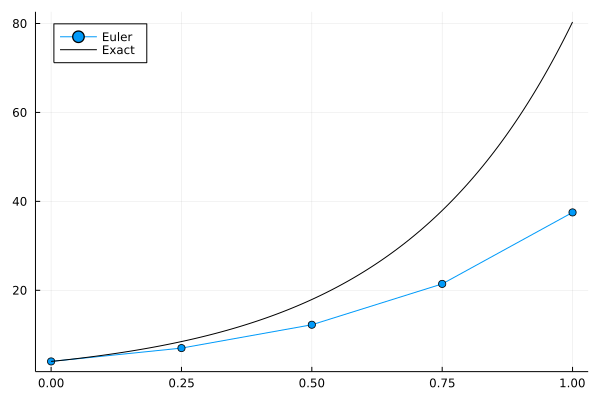

In [9]:
plot(x,y,marker=4,label="Euler")
plot!(xe,ye, color = :black, legend=:topleft,label="Exact")

### Higher resolution Solution

Now let's see how the solution improves with higher resolution.  Let's choose a resolution 
that is 10 times finer, $h \to h/10$.  The numerical solution now looks much closer to the
exact solution.

In [24]:
nz = 10*nx
z = LinRange(xmin, 10*xmax, nz)
dz = z[2] - z[1]

0.2040816326530612

In [25]:
u = zeros(nz)
u[1] = y0
for k = 1:nz-1
    u[k+1] = euler(eqs, u[k], z[k], dz, pars)
end

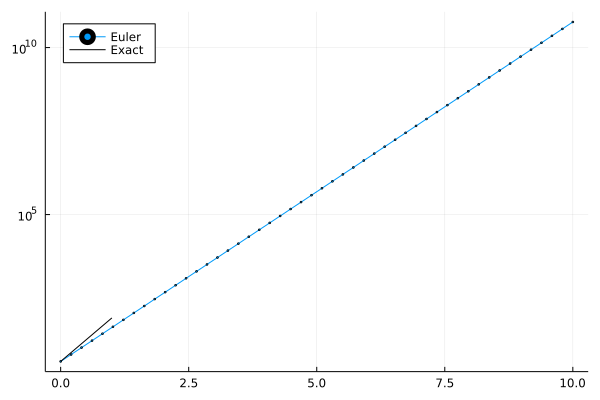

In [26]:
plot(z,u,marker=1,label="Euler")
plot!(xe,ye, color = :black, label="Exact", legend=:topleft, yaxis=:log)

### Demonstrate One Euler Step

This plot shows one step of the Euler method.  Beginning at the point $x=0.5$,
we evaluate the derivative $dy/dx = f(x,y)$ using the ODE.  We then take one step of length
$h$, approximating the project as a linear function of over the interval
$$
y_{k+1} = y_k + hf(x_k, y_k).
$$

In [13]:
function dexactsol!(df, x, pars)
    @. df = pars["lambda"]*pars["amp"]*exp(pars["lambda"]*x)
end

dexactsol! (generic function with 1 method)

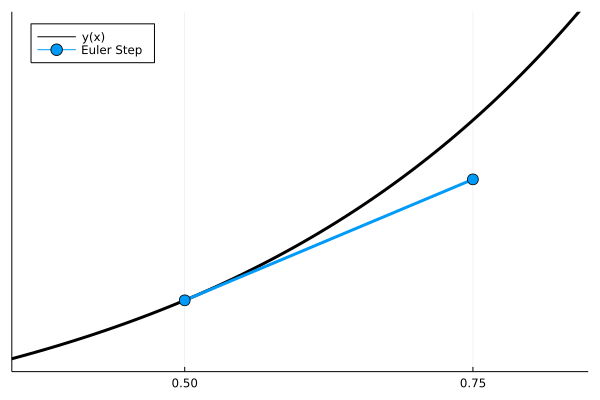

In [14]:
p = palette(:default)
f = similar(x)
df = similar(x)
exactsol!(f, x,pars)
dexactsol!(df,x,pars)
x2 = Float64[x[3], x[4]]
y2 = Float64[f[3], f[3]+df[3]*dx]
plot(xe,ye, color = :black,label="y(x)",lw=3)
plot!(x2,y2,marker=6,xlim=(0.35,0.85),ylim=(10,50),label="Euler Step",ticks=x2,lw=3,legend=:topleft,color=p[1])


In [ ]:
p = palette(:default)